# **Stock Trend Prediction - Deep Learning Techniques**

#### **Copyright© Kavindu Senevirathne**

## **1. Import Dependancies**

In [120]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error ,mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense , Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

## **2. Load Dataset**

In [26]:
data = pd.read_csv('./data/AAPL Stocks.csv')

In [27]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,126.830078,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,128.398163,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.076080,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,128.309982,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,129.417435,105158200


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [29]:
data.shape

(250, 7)

## **3. Exploratory Data Analysis (EDA)**

#### **3.1 Find Date Range**

In [30]:
data['Date']  = pd.to_datetime(data['Date'])

In [31]:
min_date = data['Date'].min()
max_date = data['Date'].max()

In [32]:
# Print date range
print(f"Date range: {min_date} to {max_date}")

Date range: 2021-01-04 00:00:00 to 2021-12-29 00:00:00


#### **3.2 Price Chart Over Time**

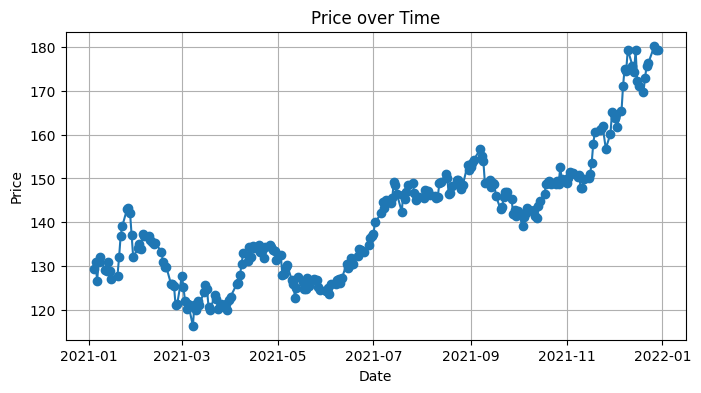

In [37]:
# Plotting
plt.figure(figsize=(8, 4))
plt.plot(data['Date'], data['Close'], marker='o')
plt.title('Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#### **3.3 Price Movements**

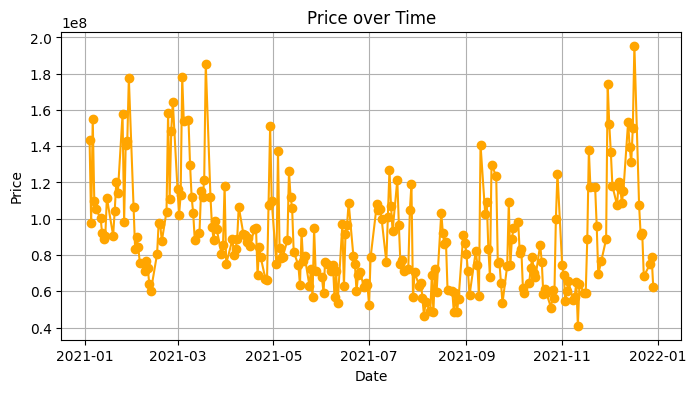

In [36]:
# Plotting
plt.figure(figsize=(8, 4))
plt.plot(data['Date'], data['Volume'], marker='o', color='orange')
plt.title('Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## **4. Data Pre-Processing**

#### **4.1 Calculate Returns**

In [39]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [40]:
# Calculate daily returns
data['Returns'] = data['Close'].pct_change() * 100

In [41]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,126.830078,143301900,NaN
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,128.398163,97664900,1.236374
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.076080,155088000,-3.366153
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,128.309982,109578200,3.412322
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,129.417435,105158200,0.863126


In [43]:
data = data.dropna()

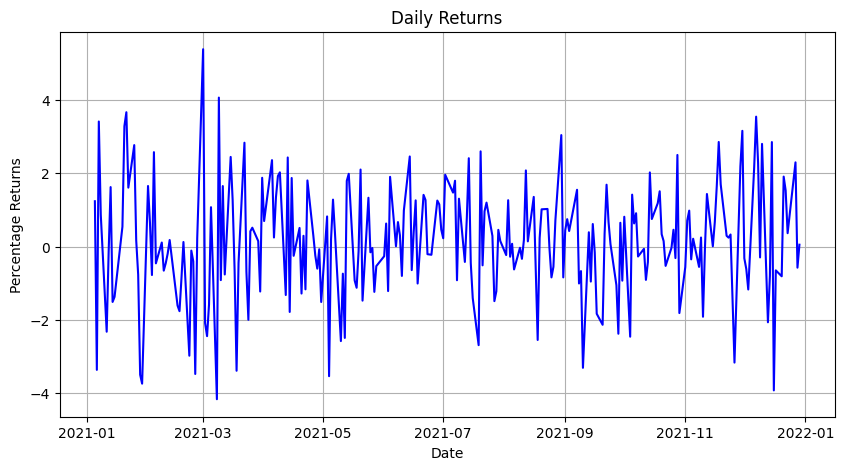

In [44]:
# Assuming 'data' DataFrame contains 'Returns' column
plt.figure(figsize=(10, 5))
plt.plot(data['Date'], data['Returns'], color='blue')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Percentage Returns')
plt.grid(True)
plt.show()

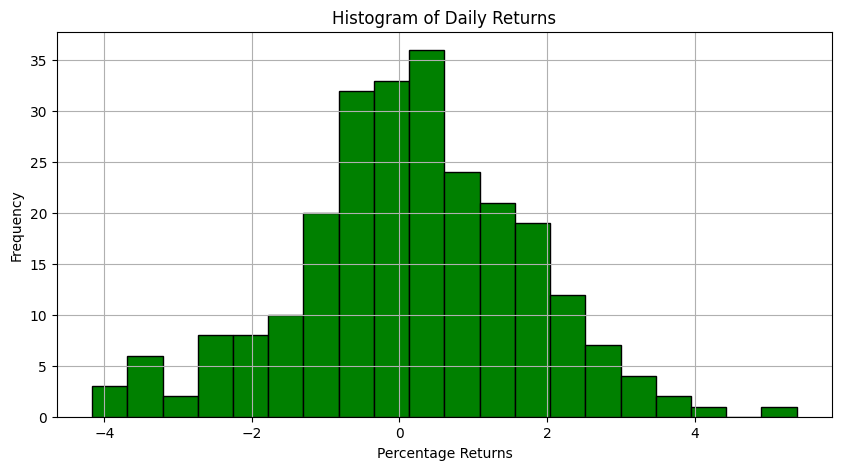

In [45]:
plt.figure(figsize=(10, 5))
plt.hist(data['Returns'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Percentage Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### **4.2 Return Trend**

In [46]:
def return_trend(x):
    if x < 0:
        return 0
    else:
        return 1

In [47]:
# Apply the function to create the 'return_trend' column
data['return_trend'] = data['Returns'].apply(return_trend)

In [48]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,return_trend
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,128.398163,97664900,1.236374,1
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.076080,155088000,-3.366153,0
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,128.309982,109578200,3.412322,1
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,129.417435,105158200,0.863126,1
5,2021-01-11,129.190002,130.169998,128.500000,128.979996,126.408653,100384500,-2.324882,0


#### **4.2 Filter Required Columns**

In [49]:
data_fd = data[['Date', 'Close','Volume','Returns','return_trend']]

In [50]:
# Rename the columns
data_fd.rename(columns={'Date': 'date', 'Close': 'close', 'Volume': 'vol', 'Returns': 'returns'}, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11320\1560975578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fd.rename(columns={'Date': 'date', 'Close': 'close', 'Volume': 'vol', 'Returns': 'returns'}, inplace=True)


In [51]:
data_fd.head()

,date,close,vol,returns,return_trend
1,2021-01-05,131.009995,97664900,1.236374,1
2,2021-01-06,126.599998,155088000,-3.366153,0
3,2021-01-07,130.919998,109578200,3.412322,1
4,2021-01-08,132.050003,105158200,0.863126,1
5,2021-01-11,128.979996,100384500,-2.324882,0


#### **4.3 Return Predictions**

In [54]:
# Create the 'return_pred' column by shifting 'return_trend' column by 1
data_fd['return_pred'] = data_fd['return_trend'].shift(-1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11320\3229538199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fd['return_pred'] = data_fd['return_trend'].shift(-1)


In [57]:
data_fd.head(3)

,date,close,vol,returns,return_trend,return_pred
1,2021-01-05,131.009995,97664900,1.236374,1,0.0
2,2021-01-06,126.599998,155088000,-3.366153,0,1.0
3,2021-01-07,130.919998,109578200,3.412322,1,1.0


In [58]:
data_fd = data_fd.dropna()

In [59]:
 # Convert 'return_pred' column to integer
data_fd['return_pred'] = data_fd['return_pred'].astype(int)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11320\3050510205.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fd['return_pred'] = data_fd['return_pred'].astype(int)


In [60]:
data_fd.head()

,date,close,vol,returns,return_trend,return_pred
1,2021-01-05,131.009995,97664900,1.236374,1,0
2,2021-01-06,126.599998,155088000,-3.366153,0,1
3,2021-01-07,130.919998,109578200,3.412322,1,1
4,2021-01-08,132.050003,105158200,0.863126,1,0
5,2021-01-11,128.979996,100384500,-2.324882,0,0


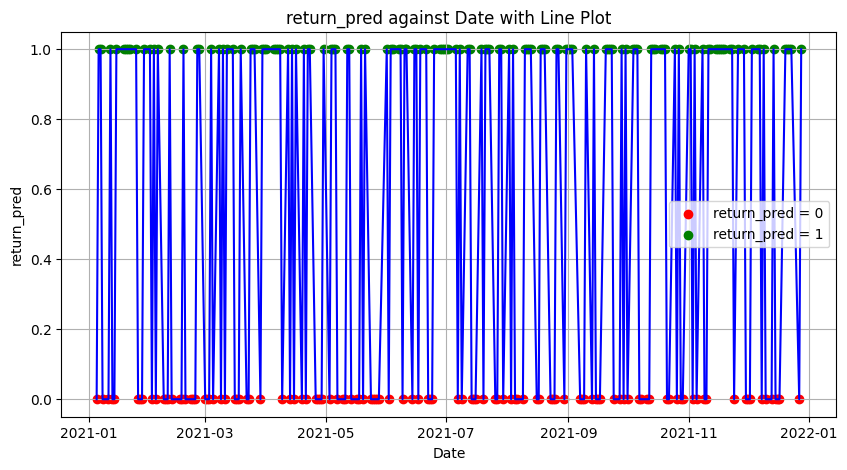

In [77]:
# Sort the DataFrame by 'Date'
data_fd = data_fd.sort_values(by='Date')

# Plotting
plt.figure(figsize=(10, 5))

# Plot line connecting points
plt.plot(data_fd['date'], data_fd['return_pred'], color='blue', linestyle='-')

# Plot points where return_pred is 0 in red
plt.scatter(data_fd[data_fd['return_pred'] == 0]['date'], data_fd[data_fd['return_pred'] == 0]['return_pred'], color='red', label='return_pred = 0')

# Plot points where return_pred is 1 in green
plt.scatter(data_fd[data_fd['return_pred'] == 1]['Date'], data_fd[data_fd['return_pred'] == 1]['return_pred'], color='green', label='return_pred = 1')

plt.title('return_pred against Date with Line Plot')
plt.xlabel('Date')
plt.ylabel('return_pred')
plt.legend()
plt.grid(True)
plt.show()

#### **4.4 Aggrigate Sentiment Data**

In [81]:
sent_data = pd.read_csv('./outputs/out_finbert_vader.csv')

In [82]:
sent_data.head()

,date,overall_trend
0,2021-01-01,0
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,0
4,2021-01-05,0


In [84]:
sent_data.shape

(364, 2)

In [85]:
sent_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           364 non-null    object
 1   overall_trend  364 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [86]:
sent_data['date'] = pd.to_datetime(sent_data['date'])

#### **4.5 Transform Sentiment Data**

In [87]:
# Merge the dataframes based on 'date' using an outer join
combined_data = pd.merge(data_fd, sent_data, on='date', how='outer')

In [90]:
combined_data.head()

,date,close,vol,returns,return_trend,return_pred,overall_trend
0,2021-01-01,NaN,NaN,NaN,NaN,NaN,0
1,2021-01-02,NaN,NaN,NaN,NaN,NaN,0
2,2021-01-03,NaN,NaN,NaN,NaN,NaN,0
3,2021-01-04,NaN,NaN,NaN,NaN,NaN,0
4,2021-01-05,131.009995,97664900.0,1.236374,1.0,0.0,0


In [93]:
combined_data.shape

(364, 7)

In [91]:
combined_data.isnull().sum()

date               0
close            116
vol              116
returns          116
return_trend     116
return_pred      116
overall_trend      0
dtype: int64

In [94]:
filtered_data = combined_data.dropna()

In [97]:
# Rename the columns
filtered_data.rename(columns={'overall_trend': 'sentiment'}, inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11320\1364222720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.rename(columns={'overall_trend': 'sentiment'}, inplace=True)


In [98]:
filtered_data.head()

,date,close,vol,returns,return_trend,return_pred,sentiment
4,2021-01-05,131.009995,97664900.0,1.236374,1.0,0.0,0
5,2021-01-06,126.599998,155088000.0,-3.366153,0.0,1.0,0
6,2021-01-07,130.919998,109578200.0,3.412322,1.0,1.0,0
7,2021-01-08,132.050003,105158200.0,0.863126,1.0,0.0,0
10,2021-01-11,128.979996,100384500.0,-2.324882,0.0,0.0,0


In [99]:
# Create the 'return_pred' column by shifting 'return_trend' column by 1
filtered_data['sent_pred'] = filtered_data['sentiment'].shift(-1)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11320\3108370188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sent_pred'] = filtered_data['sentiment'].shift(-1)


In [100]:
filtered_data.head()

,date,close,vol,returns,return_trend,return_pred,sentiment,sent_pred
4,2021-01-05,131.009995,97664900.0,1.236374,1.0,0.0,0,0.0
5,2021-01-06,126.599998,155088000.0,-3.366153,0.0,1.0,0,0.0
6,2021-01-07,130.919998,109578200.0,3.412322,1.0,1.0,0,0.0
7,2021-01-08,132.050003,105158200.0,0.863126,1.0,0.0,0,0.0
10,2021-01-11,128.979996,100384500.0,-2.324882,0.0,0.0,0,0.0


In [101]:
filtered_data.shape

(248, 8)

## **5. Check Sentiment Analysis Accuracy**

In [102]:
# Calculate the number of correct predictions
correct_predictions = (filtered_data['return_trend'] == filtered_data['sentiment']).sum()

# Calculate the total number of predictions
total_predictions = len(filtered_data)

# Calculate the accuracy
accuracy = correct_predictions / total_predictions

print(f'Accuracy: {accuracy:.2%}')

Accuracy: 47.58%


## **6. Stock Price/Trend Prediction with LSTM**

In [104]:
# Select relevant columns
df = filtered_data[['date', 'close', 'vol', 'returns', 'return_trend', 'return_pred', 'sentiment', 'sent_pred']]

In [105]:
df.head()

,date,close,vol,returns,return_trend,return_pred,sentiment,sent_pred
4,2021-01-05,131.009995,97664900.0,1.236374,1.0,0.0,0,0.0
5,2021-01-06,126.599998,155088000.0,-3.366153,0.0,1.0,0,0.0
6,2021-01-07,130.919998,109578200.0,3.412322,1.0,1.0,0,0.0
7,2021-01-08,132.050003,105158200.0,0.863126,1.0,0.0,0,0.0
10,2021-01-11,128.979996,100384500.0,-2.324882,0.0,0.0,0,0.0


#### **6.1 Standardizing**

In [106]:
# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['date']))

#### **6.2 Model Building**

In [107]:
# Create sequences for LSTM
def create_sequences(data, n_steps=3):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix, 0]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [108]:
n_steps = 3
X, y = create_sequences(df_scaled, n_steps)

In [109]:
# training and testing split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [114]:
# Build the LSTM model
model = Sequential()
model.add(Input(shape=(n_steps, X.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [115]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.0577 - val_loss: 0.2275
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0314 - val_loss: 0.1337
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0235 - val_loss: 0.0931
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0231 - val_loss: 0.0978
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0187 - val_loss: 0.1069
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154 - val_loss: 0.0941
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0139 - val_loss: 0.0799
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0105 - val_loss: 0.0602
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0084 - val_loss: 0.0421
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - val_loss: 0.0304
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0036 - val_loss: 0.0176
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - val_los

In [116]:
# Make predictions
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step


In [117]:
# Inverse transform the predictions and actual values
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), df_scaled.shape[1] - 1))), axis=1))[:, 0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((len(y_pred), df_scaled.shape[1] - 1))), axis=1))[:, 0]

#### **6.3 Model Evaluation**

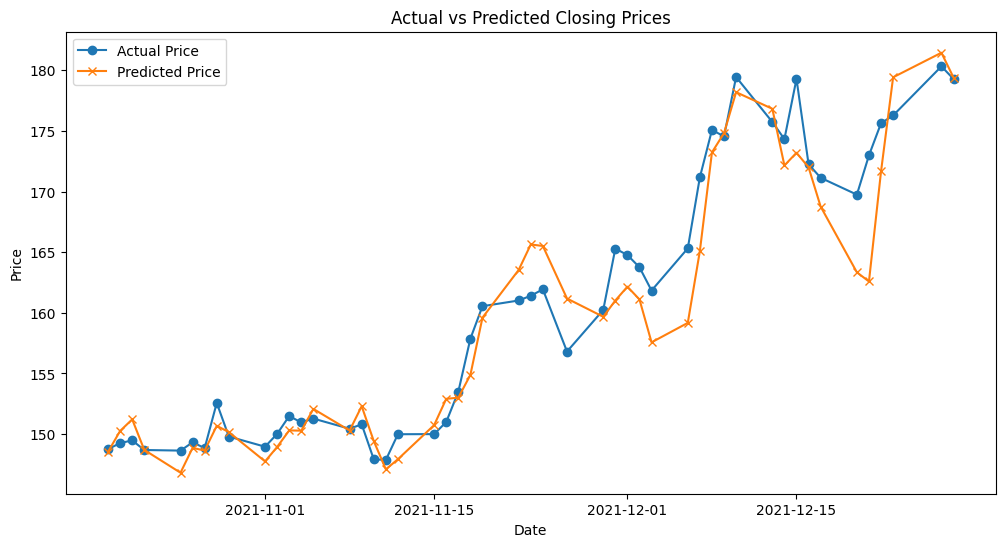

In [118]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['date'].values[-len(y_test):], y_test_inv, marker='o', label='Actual Price')
plt.plot(df['date'].values[-len(y_test):], y_pred_inv, marker='x', label='Predicted Price')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

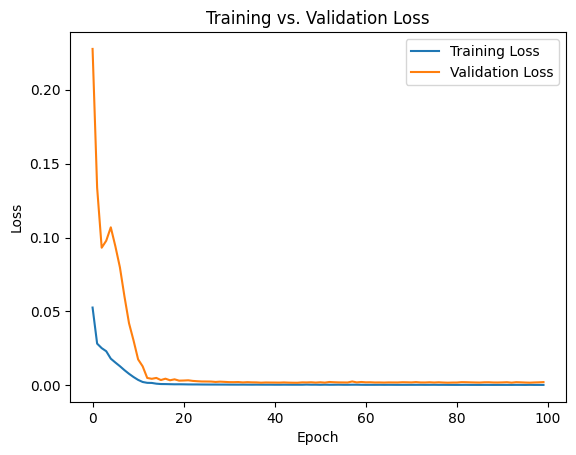

In [129]:
# Plot training vs. validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

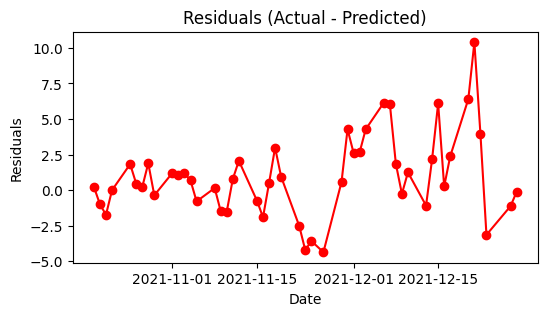

In [128]:
# Plot residuals
residuals = y_test_inv - y_pred_inv
plt.figure(figsize=(6, 3))
plt.plot(df['date'].values[-len(y_test):], residuals, marker='o', linestyle='-', color='r')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.show()

Text(0, 0.5, 'Predicted Prices')

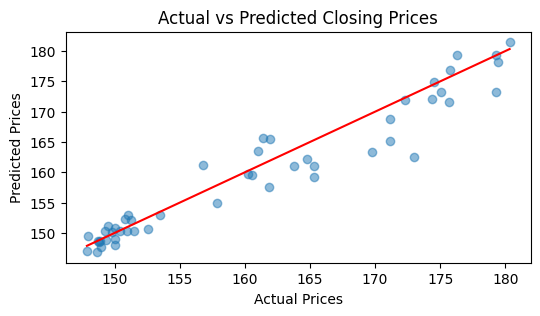

In [127]:
# Plot actual vs predicted
plt.figure(figsize=(6, 3))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.5)
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], color='red')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

#### **6.4 Accuracy Scores**

In [197]:
print(pd.DataFrame({
    'y_pred_inv': y_pred_inv[:5],
    'y_test_inv': y_test_inv[:5]
}
))

   y_pred_inv  y_test_inv
0  148.536848  148.759995
1  150.261751  149.259995
2  151.215729  149.479996
3  148.696632  148.690002
4  146.815220  148.639999


In [235]:
# errors
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 2.19
Mean Squared Error (MSE): 9.22
Root Mean Squared Error (RMSE): 3.04


#### **6.5 Make Predictions**

In [174]:
# Define a function to make future predictions
def predict_future(model, last_sequence, n_steps=3, n_future=3):
    future_predictions = []
    current_sequence = last_sequence.copy()
    for i in range(n_future):
        # Predict next value
        next_prediction = model.predict(current_sequence.reshape(1, n_steps, -1))[0, 0]
        # Append prediction to list
        future_predictions.append(next_prediction)
        # Shift sequence by one and append prediction
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = next_prediction
    return future_predictions

# Take the last sequence from the test data as the starting point for future predictions
last_sequence = X_test[-1]

# Predict future values
n_future = 3  # Number of future values to predict
future_predictions = predict_future(model, last_sequence, n_steps=n_steps, n_future=n_future)

# Reshape future predictions to match the input data shape
future_predictions_arr = np.array(future_predictions).reshape(-1, 1)

# Inverse transform the predictions
future_predictions_inv = scaler.inverse_transform(np.concatenate((last_sequence[:, 1:], future_predictions_arr), axis=1))
future_predictions_inv = future_predictions_inv[:, -1]

# Print future predictions
print("Future Predictions:")
for i, prediction in enumerate(future_predictions_inv):
    print(f"Day {i+1}: Predicted Close Price = {prediction:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Future Predictions:
Day 1: Predicted Close Price = 0.99
Day 2: Predicted Close Price = 1.07
Day 3: Predicted Close Price = 1.16


In [208]:
# Print actual and inverse-transformed values for debugging
print("Original y_test values:")
print(y_test[:5])  # Print first 5 values for inspection
print("\nInverse-transformed y_test_inv values:")
print(y_test_inv[:5])  # Print first 5 values for inspection


Original y_test values:
[0.50648731 0.51430348 0.51774261 0.50539316 0.5046115 ]

Inverse-transformed y_test_inv values:
[148.759995 149.259995 149.479996 148.690002 148.639999]


In [218]:
# Reshape the future predictions array to match the expected shape for inverse transformation
future_predictions_reshaped = future_predictions_arr.reshape(-1, 1)

# Create an array of zeros with the same number of columns as the original scaled data, except for the first column
zeros_array = np.zeros((len(future_predictions_reshaped), df_scaled.shape[1] - 1))

# Concatenate the reshaped future predictions array with the zeros array
future_predictions_concat = np.concatenate((future_predictions_reshaped, zeros_array), axis=1)

# Inverse transform the concatenated array
future_predictions_inv = scaler.inverse_transform(future_predictions_concat)

# Extract the first column of the inverse-transformed array as the future predictions
future_predictions_inv_first_col = future_predictions_inv[:, 0]

# Print future predictions
print("Future Predictions:")
for i, prediction in enumerate(future_predictions_inv_first_col):
    print(f"Day {i+1}: Predicted Close Price = {prediction:.2f}")


Future Predictions:
Day 1: Predicted Close Price = 179.41
Day 2: Predicted Close Price = 184.55
Day 3: Predicted Close Price = 190.45


In [225]:
# Create a list of future dates starting from the last date in the original data
future_dates = pd.date_range(start=filtered_data['date'].iloc[-1], periods=n_future + 1)[1:]

# Create a DataFrame to store future predictions with dates
future_predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Close_Price': future_predictions_inv_first_col
})


In [226]:
future_predictions_df

,Date,Predicted_Close_Price
0,2021-12-29,179.410370
1,2021-12-30,184.545104
2,2021-12-31,190.445330


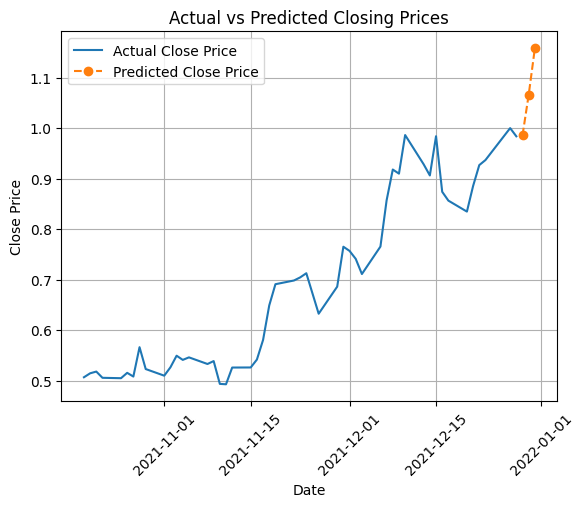

In [181]:
# Plot actual closing prices
plt.plot(filtered_data['date'].values[-len(X_test):], y_test, label='Actual Close Price')

# Plot future predictions
future_dates = pd.date_range(start=filtered_data['date'].iloc[-1], periods=n_future + 1)[1:]
plt.plot(future_dates, future_predictions_inv, label='Predicted Close Price', linestyle='--', marker='o')

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

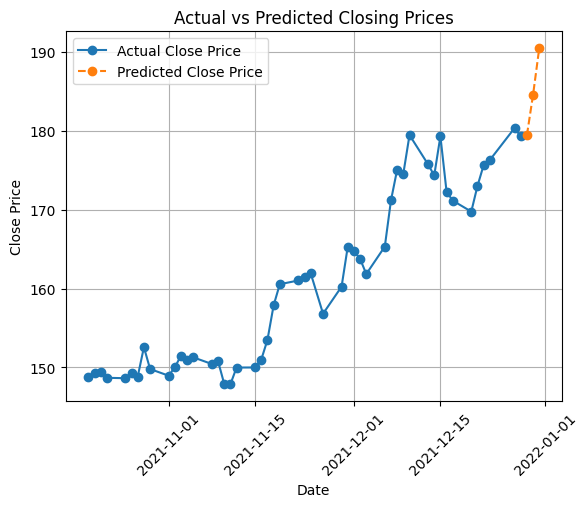

In [222]:
import matplotlib.pyplot as plt

# Plot actual closing prices
plt.plot(filtered_data['date'].values[-len(X_test):], y_test_inv, label='Actual Close Price', marker='o')

# Plot future predictions
future_dates = pd.date_range(start=filtered_data['date'].iloc[-1], periods=n_future + 1)[1:]
plt.plot(future_dates, future_predictions_inv_first_col, label='Predicted Close Price', linestyle='--', marker='o')

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


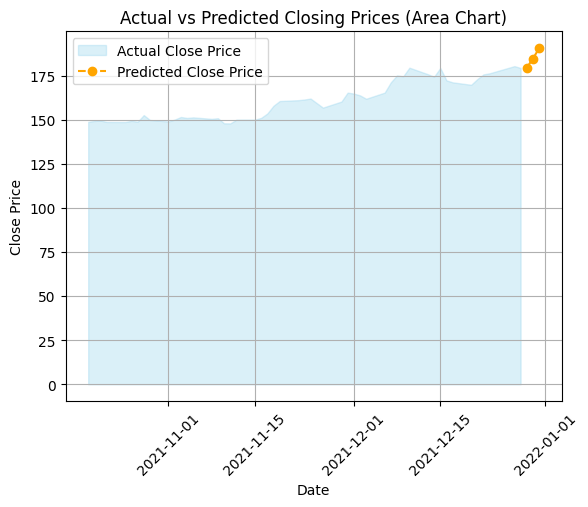

In [233]:
# Plot actual closing prices as an area chart
plt.fill_between(filtered_data['date'].values[-len(X_test):], y_test_inv, label='Actual Close Price', color='skyblue', alpha=0.3)

# Plot future predictions
plt.plot(future_dates, future_predictions_inv_first_col, label='Predicted Close Price', linestyle='--', color='orange', marker='o')

plt.title('Actual vs Predicted Closing Prices (Area Chart)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## **7. Decision Making**

#### **7.1 Tomorrow Price Trend Predictions**

In [223]:
def get_tomorrows_price_movement(future_predictions):
    """
    Determine tomorrow's price movement (up or down) based on the future predictions array.

    Parameters:
    - future_predictions (array): Array containing future predicted close prices.

    Returns:
    - str: "Up" if tomorrow's price is predicted to increase, "Down" if it's predicted to decrease,
           and "No Change" if there's no predicted change.
    """
    if len(future_predictions) >= 2:
        # Compare tomorrow's prediction with today's prediction
        if future_predictions[-1] > future_predictions[-2]:
            return "Up"
        elif future_predictions[-1] < future_predictions[-2]:
            return "Down"
    # If there's only one prediction or no change in predictions
    return "No Change"

In [224]:
price_movement = get_tomorrows_price_movement(future_predictions)
print("Tomorrow's Price Movement:", price_movement)

Tomorrow's Price Movement: Up
